# AirBnB Madrid

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Uno de nuestros clientes opera en el mercado de inmuebles. Está especialmente
interesado en Madrid, donde posee una cantidad importante de viviendas
publicadas en la plataforma AirBnB y nos pide que le asesoremos respondiendo a
la siguiente pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué puedo hacer para optimizar el precio de mis viviendas?
</div>

El objetivo del proyecto será elaborar un Data Storytelling que de respuesta a
nuestro cliente siguiendo los siguientes pasos:

1. Elaborar un contexto del problema
2. Definir el problema que queremos resolver
3. Definir y desarrollar el roadmap del análisis
4. Recopilar los principales insights para montar el data storytelling final:
    - contexto
    - problema
    - insights

# 0. Data

Para realizar este proyecto contamos con el siguiente set de datos:

| Fichero                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| airbnb_madrid_host.parquet       | Información del propietario de cada vivienda.                               |
| airbnb_madrid_location.parquet   | Información de la localización de cada vivienda.                            |
| airbnb_madrid_property.parquet   | Información de la vivienda.                                                 |
| airbnb_madrid_conditions.parquet | Información de las condiciones de cada vivienda para poder alquilarla.      |
| airbnb_madrid_reviews.parquet    | Información de las reseñas de cada vivienda.                                |

Y en cada set de datos se cuenta con las siguientes variables:

airbnb_madrid_host.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| host_response_time               | Tiempo que tarda el anfitrión en responder a las consultas.                 |
| host_response_rate               | Tasa de respuesta del anfitrión.                                            |
| host_is_superhost                | Indica si el anfitrión es un "superhost" o no.                              |
| host_has_profile_pic             | Indica si el anfitrión tiene una foto de perfil en su cuenta.               |
| host_identity_verified           | Indica si la identidad del anfitrión ha sido verificada por Airbnb.         |
| host_seniority                   | Antigüedad del anfitrión como miembro de Airbnb.                            |
| host_verifications_email         | Indica si el anfitrión ha verificado su correo electrónico.                 |
| host_verifications_phone         | Indica si el anfitrión ha verificado su número de teléfono.                 |
| host_verifications_reviews       | Indica si el anfitrión ha verificado a través de reseñas de otros huéspedes.|
| host_verifications_facebook      | Indica si el anfitrión ha verificado su cuenta de Facebook.                 |
| calculated_host_listings_count   | Número de propiedades que el anfitrión tiene en Airbnb.                     |
| host_verifications_government_id | Indica si el anfitrión ha verificado su identificación gubernamental.       |

airbnb_madrid_location.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| neighbourhood                    | Barrio donde se encuentra la propiedad.                                     |
| neighbourhood_group              | Grupo de barrios al que pertenece el barrio.                                |
| latitude                         | Latitud de la ubicación de la propiedad.                                    |
| longitude                        | Longitud de la ubicación de la propiedad.                                   |
| dist_km_sol                      | Distancia en kilómetros desde la propiedad hasta la plaza de de Sol.        |
| dist_km_airport                  | Distancia en kilómetros desde la propiedad hasta el aeropuerto.             |

airbnb_madrid_property.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| property_type                    | Tipo de propiedad (casa, apartamento, etc.).                                |
| room_type                        | Tipo de habitación (compartida, privada, etc.).                             |
| accommodates                     | Número máximo de huéspedes que pueden alojarse en la propiedad.             |
| bathrooms                        | Número de baños en la propiedad.                                            |
| bedrooms                         | Número de dormitorios en la propiedad.                                      |
| beds                             | Número de camas en la propiedad.                                            |
| bed_type                         | Tipo de cama (individual, doble, etc.).                                     |
| amenities_wifi_internet          | Indica si la propiedad ofrece wifi o internet como amenidad.                |
| amenities_tv                     | Indica si la propiedad ofrece televisión como amenidad.                     |
| amenities_air_conditioning       | Indica si la propiedad ofrece aire acondicionado como amenidad.             |
| amenities_heating                | Indica si la propiedad ofrece calefacción como amenidad.                    |
| amenities_kitchen                | Indica si la propiedad ofrece cocina como amenidad.                         |

airbnb_madrid_conditions.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| price                            | Precio de alquiler por noche de la propiedad.                               |
| minimum_nights                   | Mínimo de noches requeridas para reservar la propiedad.                     |
| maximum_nights                   | Máximo de noches permitidas para reservar la propiedad.                     |
| cancellation_policy              | Política de cancelación de reservas de la propiedad.                        |
| require_guest_profile_picture    | Indica si se requiere foto de perfil de los huéspedes.                      |
| require_guest_phone_verification | Indica si se requiere verificación telefónica de los huéspedes.             |

airbnb_madrid_reviews.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| number_of_reviews                | Número total de reseñas recibidas para la propiedad.                        |
| number_of_reviews_ltm            | Número de reseñas recibidas en el último año.                               |
| review_scores_rating             | Puntuación general de reseñas de la propiedad.                              |
| review_scores_accuracy           | Puntuación de precisión en las reseñas de la propiedad.                     |
| review_scores_cleanliness        | Puntuación de limpieza en las reseñas de la propiedad.                      |
| review_scores_checkin            | Puntuación de check-in en las reseñas de la propiedad.                      |
| review_scores_communication      | Puntuación de comunicación en las reseñas de la propiedad.                  |
| review_scores_location           | Puntuación de ubicación en las reseñas de la propiedad.                     |
| review_scores_value              | Puntuación de valor en las reseñas de la propiedad.                         |
| reviews_per_month                | Número promedio de reseñas por mes para la propiedad.                       |
| days_since_last_review           | Días transcurridos desde la última reseña recibida para la propiedad.       |
| days_since_first_review          | Días transcurridos desde la primera reseña recibida para la propiedad.      |
| number_of_reviews_en             | Número de reseñas en inglés recibidas para la propiedad.                    |
| number_of_reviews_es             | Número de reseñas en español recibidas para la propiedad.                   |
| number_of_reviews_otros          | Número de reseñas en otros idiomas recibidas para la propiedad.             |

# 1. Elaborar un contexto del problema

Antes de poder definir concretamente el problema que vamos a resolver es
importante ganar algo de contexto. Dedica un poco de tiempo a echar un ojo a los
datos con los que contamos y a sacar unas primeras estadísticas y
visualizaciones. 

El dataset contiene muchas variables, piensa en qué está interesado el cliente y
céntrate en la información esencial para darle un contexto de los datos adecuado.

# 2. Definir el problema que queremos resolver

Una vez mas un cliente nos pide dar respuesta a un problema mal definido. Antes
de lanzarte a picar código es necesario que definas correctamente el problema
que quieres responder. Convierte la pregunta inicial a una en la que el problema
cumpla con los **4 principios esenciales** que hemos visto. Hazte las siguientes
preguntas para entender si vas por buen camino:
- **concreto**: ¿hay alguna ambigüedad en la definición del problema? ¿queda
suficientemente claro para que no haya errores de interpretación ni mal
entendidos?
- **alcance**: ¿está claro cuándo se va a acabar el análisis?
- **valor**: ¿la solución al problema tiene valor para el cliente?
- **accionable**: ¿el cliente tiene capacidad de accionar la solución al
problema?

Cuando vayais ideando vuestra definición del problema podeis escribirme por
privado en Slack para daros el OK y pasar a la siguiente fase.

# 3. Definir y desarrollar el Roadmap del analisis

El dataset tiene muchas variables y tienes un tiempo muy limitado, no tienes que
analizar todo ni dar respuesta a todas las hipótesis que se te ocurran al
inicio, lo importante es que el enfoque para realizar el data storytelling sea
correcto, el resto es echarle mas horas.

Con el tiempo que tienes piensa una lista de hipótesis y las preguntas que
quieres responder con los datos. Estructura el roadmap y prioriza las
hipótesis que creas más prometedoras. Cuando tengas el roadmap claro analiza
los datos con estadísticas y visualizaciones.

# 4. Recopilar los principales insights para montar el storytelling final

Con todo lo trabajado en las anteriores secciones monta un data storytelling con
las siguientes secciones:

- **Contexto**: contexto al problema
- **Problema**: problema definido
- **Insights**: principales insights extraidos en tus análisis

Puedes montar el data storytelling en Google Slides o en un Jupyter Notebook.

## ROADMAP del ANALISIS

1 Hipotesis:
- Alquilamos apartamento entero o por habitaciones?
- Cuantos usuarios se pueden hospedar?
- Condiciones del apartamento: Número de habitaciones, de camas, de baños, cocina, wifi, Tv, aire acondicionado y amenities.

2 Hipotesis:
- Localización. Zona, cerca del centro, distancia al aeropuerto.
- Servicios publicos cerca. Metro, guaguas, hospitales.

3. Hipotesis:
- Politica de cancelación.
- Servicio hospederia, respuesta rápida, soluciones rápidas.
- Reviews de la casa, de la zona, etc..

In [2]:
df_host = pd.read_parquet(r"C:\Users\andy_\Documents\Bootcamp DA\Clases estadistica\examen\airbnb_madrid_host.parquet")

In [3]:
df_property = pd.read_parquet(r"C:\Users\andy_\Documents\Bootcamp DA\Clases estadistica\examen\airbnb_madrid_property.parquet")

In [4]:
df_location = pd.read_parquet(r"C:\Users\andy_\Documents\Bootcamp DA\Clases estadistica\examen\airbnb_madrid_location.parquet")

In [5]:
df_conditions = pd.read_parquet(r"C:\Users\andy_\Documents\Bootcamp DA\Clases estadistica\examen\airbnb_madrid_conditions.parquet")

In [6]:
df_reviews = pd.read_parquet(r"C:\Users\andy_\Documents\Bootcamp DA\Clases estadistica\examen\airbnb_madrid_reviews.parquet")
df_reviews

,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros
0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
1,3,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0
2,4,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0
3,6,170,17,93.0,10.0,10.0,10.0,10.0,10.0,10.0,1.47,46,3475,133.0,23.0,14.0
4,8,162,12,93.0,9.0,9.0,9.0,10.0,10.0,9.0,1.41,161,3441,99.0,44.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,21348,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
11085,21349,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3,3,1.0,0.0,0.0
11086,21350,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
11087,21352,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN


In [7]:
# extraer automáticamente las columnas que son numéricas
numeric_cols = [c for c, t in zip(df_reviews.columns, df_reviews.dtypes) if t != "O"]
# calcular la media y mediana de todas las columnas numéricas
df_reviews[numeric_cols].agg(["mean", "median"]).transpose()

,mean,median
id,10224.808012,9830.00
number_of_reviews,45.807190,15.00
number_of_reviews_ltm,17.777078,7.00
review_scores_rating,91.805951,94.00
review_scores_accuracy,9.486675,10.00
review_scores_cleanliness,9.375107,10.00
review_scores_checkin,9.573248,10.00
review_scores_communication,9.617014,10.00
review_scores_location,9.701199,10.00
review_scores_value,9.109280,9.00


### Graficamos las reviews

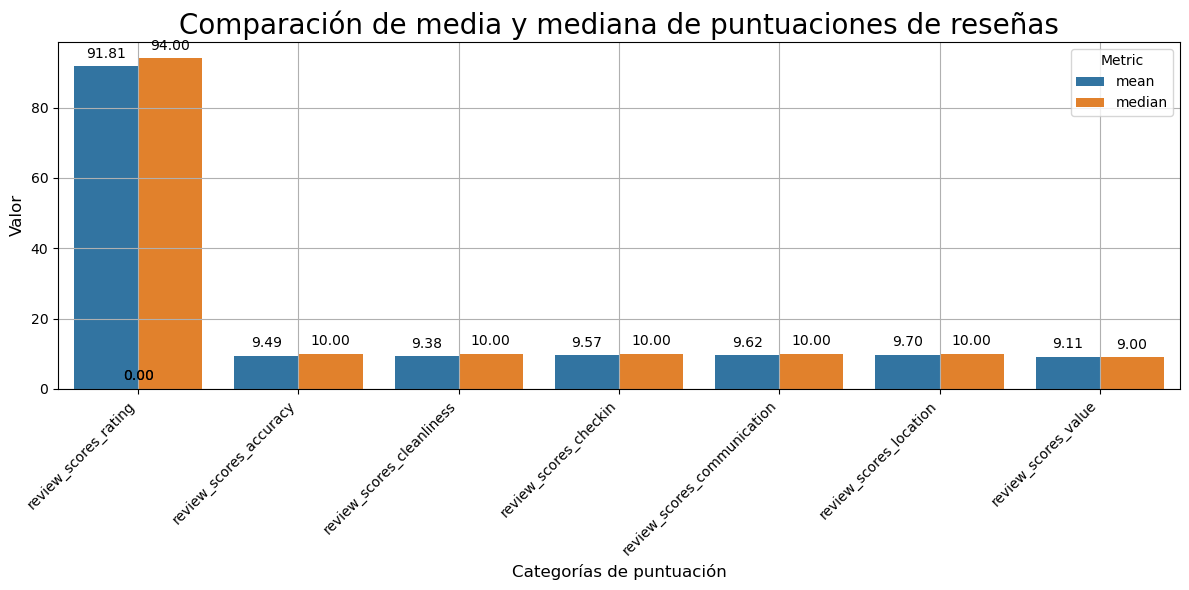

In [8]:
# Datos de media y mediana
data = {
    'mean': [91.805951, 9.486675, 9.375107, 9.573248, 9.617014, 9.701199, 9.109280],
    'median': [94.00, 10.00, 10.00, 10.00, 10.00, 10.00, 9.00],
}

# Columnas relacionadas con las puntuaciones de reseñas
columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Crear DataFrame
df_metrics = pd.DataFrame(data, index=columns)

# Transformar el DataFrame a formato largo para seaborn
df_melted = df_metrics.reset_index().melt(id_vars='index', value_vars=['mean', 'median'],
                                          var_name='Metric', value_name='Value')
df_melted.columns = ['Review Category', 'Metric', 'Value']

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Review Category', y='Value', hue='Metric', data=df_melted)

# Añadir porcentajes a las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 9), textcoords='offset points')

# Configurar el gráfico
plt.title('Comparación de media y mediana de puntuaciones de reseñas', fontsize=20)
plt.xlabel('Categorías de puntuación', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

## Después de realizar la media, mediana y los quantiles de los reviews se puede sacar las siguientes conclusiones:
- El numero de reseñas es bajo en el quantil 25 y en el 50, casi 60 en ql quantil 75.
- Numero de reseñas es muy bajo en los 3 quantiles.
- El rating de resultados de reseñas es muy alto. Una media del 94%
- Hay muy buena valoración en  reseñas de exactitud, limpieza, checkin, comunicacion a las reseñas, a la localización y el cañor de las reseñas.
- La frecuencia de reseñas es bastante baja.
- Hay casi el mismo numero de reseñas en inglés que en Español. Quiere decir que se alquila practicamente lo mismo a españoles que ha extranjeros.

In [9]:
# extraer automáticamente las columnas que son numéricas
numeric_cols = [c for c, t in zip(df_reviews.columns, df_reviews.dtypes) if t != "O"]
# calcular estadísticos a la vez de todas las columnas numéricas
statistics = {
    "mean": "mean", 
    "q25": lambda x: x.quantile(0.25),
    "q50": lambda x: x.quantile(0.50),
    "q75": lambda x: x.quantile(0.75),
    "std": "std",
    "var": "var",
}
df_statistics = (
    df_reviews[numeric_cols]
    .agg(statistics.values())
    .transpose()
)
df_statistics.columns = statistics.keys()
df_statistics

,mean,q25,q50,q75,std,var
id,10224.808012,4994.50,9830.00,15211.00,6126.696278,3.753641e+07
number_of_reviews,45.807190,2.00,15.00,59.00,70.650387,4.991477e+03
number_of_reviews_ltm,17.777078,1.00,7.00,29.00,22.660292,5.134888e+02
review_scores_rating,91.805951,90.00,94.00,98.00,9.447968,8.926410e+01
review_scores_accuracy,9.486675,9.00,10.00,10.00,0.931851,8.683463e-01
review_scores_cleanliness,9.375107,9.00,10.00,10.00,0.947868,8.984534e-01
review_scores_checkin,9.573248,9.00,10.00,10.00,0.895319,8.015959e-01
review_scores_communication,9.617014,9.00,10.00,10.00,0.858348,7.367610e-01
review_scores_location,9.701199,10.00,10.00,10.00,0.689654,4.756231e-01
review_scores_value,9.109280,9.00,9.00,10.00,0.995140,9.903046e-01


### Distribucion de las reseñas y calificaciones (Histograma y Boxplots)

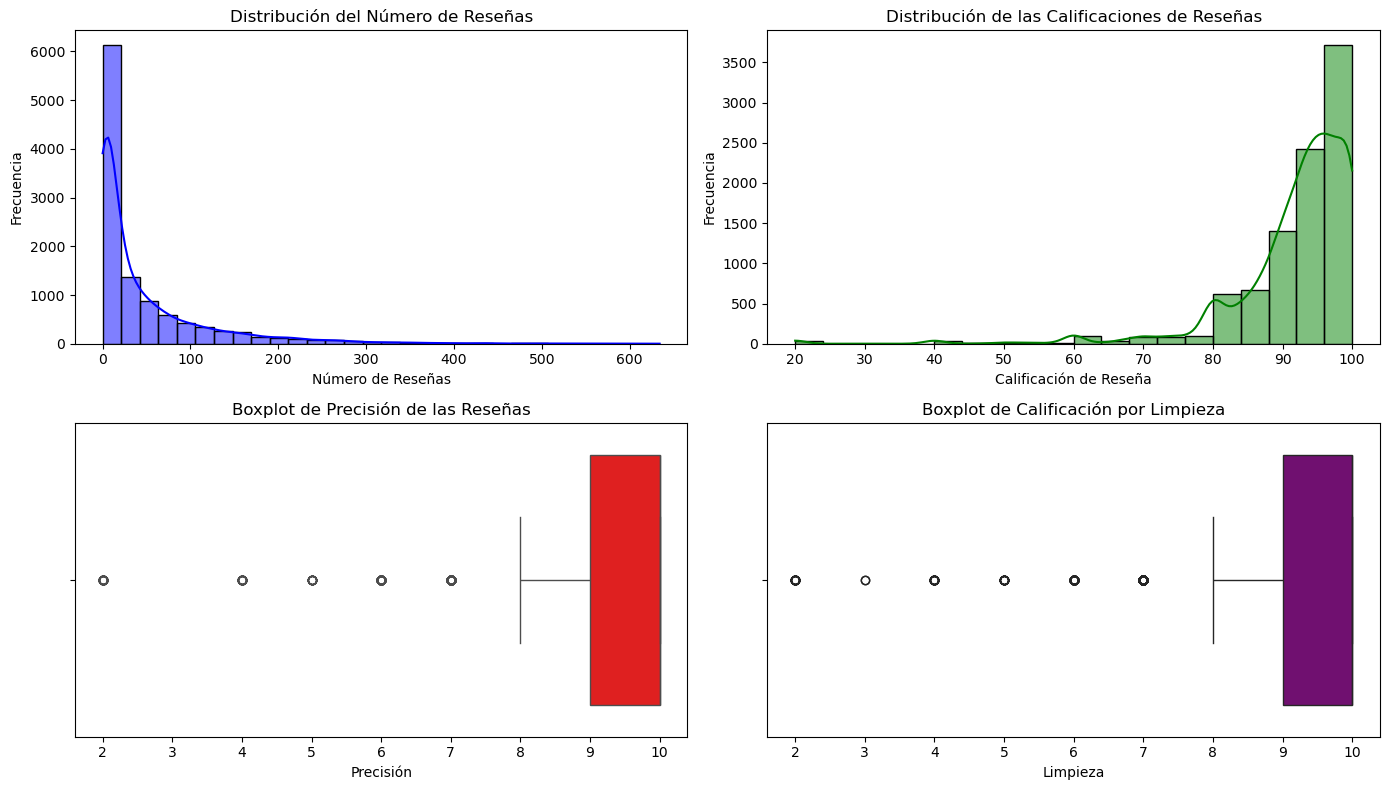

In [10]:
# Configuración de la gráfica
plt.figure(figsize=(14, 8))

# Histograma del número de reseñas
plt.subplot(2, 2, 1)
sns.histplot(df_reviews['number_of_reviews'], kde=True, color='blue', bins=30)
plt.title('Distribución del Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')

# Histograma de las calificaciones de las reseñas
plt.subplot(2, 2, 2)
sns.histplot(df_reviews['review_scores_rating'], kde=True, color='green', bins=20)
plt.title('Distribución de las Calificaciones de Reseñas')
plt.xlabel('Calificación de Reseña')
plt.ylabel('Frecuencia')

# Boxplot de las calificaciones de las reseñas por precisión
plt.subplot(2, 2, 3)
sns.boxplot(x=df_reviews['review_scores_accuracy'], color='red')
plt.title('Boxplot de Precisión de las Reseñas')
plt.xlabel('Precisión')

# Boxplot de las reseñas por limpieza
plt.subplot(2, 2, 4)
sns.boxplot(x=df_reviews['review_scores_cleanliness'], color='purple')
plt.title('Boxplot de Calificación por Limpieza')
plt.xlabel('Limpieza')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Mapa de calor con la correlación entre las calificaciones de las reseñas

### Número de reseñas por idioma

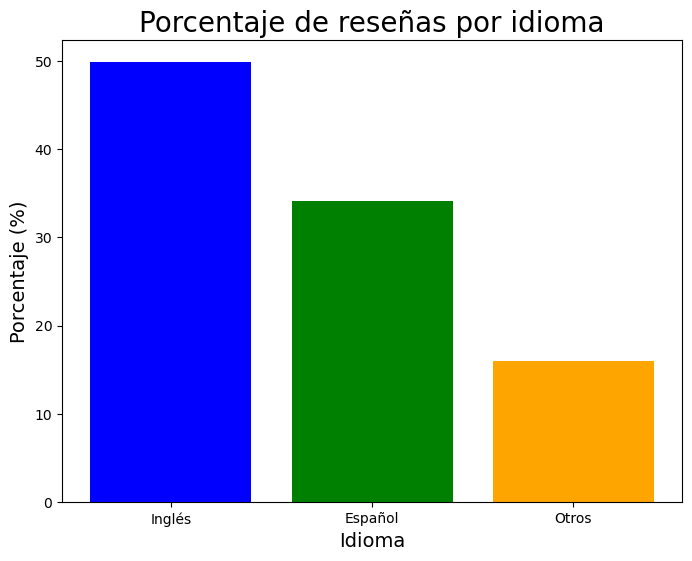

In [11]:
# Suponiendo que tienes el DataFrame df_reviews cargado correctamente

# Calcular el total de reseñas en cada idioma
total_reviews_en = df_reviews['number_of_reviews_en'].sum()
total_reviews_es = df_reviews['number_of_reviews_es'].sum()
total_reviews_otros = df_reviews['number_of_reviews_otros'].sum()

# Calcular el total general de reseñas
total_reviews = total_reviews_en + total_reviews_es + total_reviews_otros

# Calcular los porcentajes
percent_en = (total_reviews_en / total_reviews) * 100
percent_es = (total_reviews_es / total_reviews) * 100
percent_otros = (total_reviews_otros / total_reviews) * 100

# Crear un DataFrame con los porcentajes
languages = ['Inglés', 'Español', 'Otros']
percentages = [percent_en, percent_es, percent_otros]

df_percentage = pd.DataFrame({
    'Idioma': languages,
    'Porcentaje': percentages
})

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_percentage['Idioma'], df_percentage['Porcentaje'], color=['blue', 'green', 'orange'])

# Añadir título y etiquetas
plt.title('Porcentaje de reseñas por idioma', fontsize=20)
plt.xlabel('Idioma', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)

# Mostrar el gráfico
plt.show()

### Distribución de numero de reseñas por mes, se puede ver que hay un gran flujo y basnte similar, quitando los meses desde septiembre a diciembre que van bajando

### El rating de las reseñas es muy alto y muy positivo, los datos se mueven en su mayoria entre el 80 y el 100% y los otros datos son residuales

<Axes: xlabel='count', ylabel='tipos reseñas'>

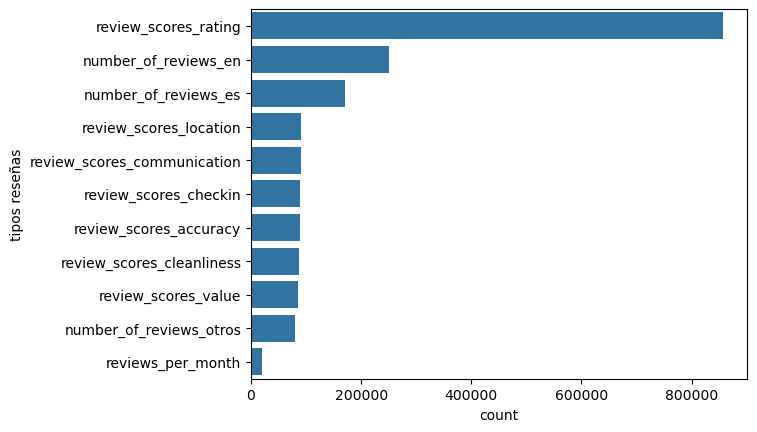

In [12]:
# contar el número de elementos de cada género
tipos_reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'number_of_reviews_en', 'number_of_reviews_es',
       'number_of_reviews_otros']
df_ = df_reviews[tipos_reviews].sum().to_frame().reset_index()
df_.columns = ["tipos reseñas", "count"]
# bar-plot
sns.barplot(
    data=df_.sort_values("count", ascending=False),
    y="tipos reseñas",
    x="count",
    )

### Gráfico del histórico de reseñas a lo largo del tiempo

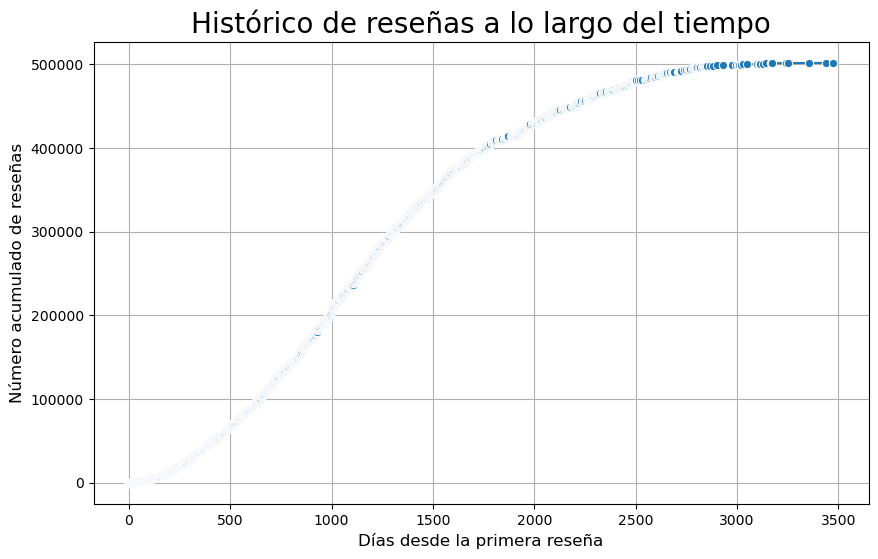

In [13]:
# Ordenar los datos por 'days_since_first_review' de manera ascendente
df_reviews_sorted = df_reviews.sort_values(by='days_since_first_review')

# Calcular el número acumulado de reseñas
df_reviews_sorted['cumulative_reviews'] = df_reviews_sorted['number_of_reviews'].cumsum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_since_first_review', y='cumulative_reviews', data=df_reviews_sorted, marker='o')

# Configurar la gráfica
plt.title('Histórico de reseñas a lo largo del tiempo', fontsize=20)
plt.xlabel('Días desde la primera reseña', fontsize=12)
plt.ylabel('Número acumulado de reseñas', fontsize=12)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

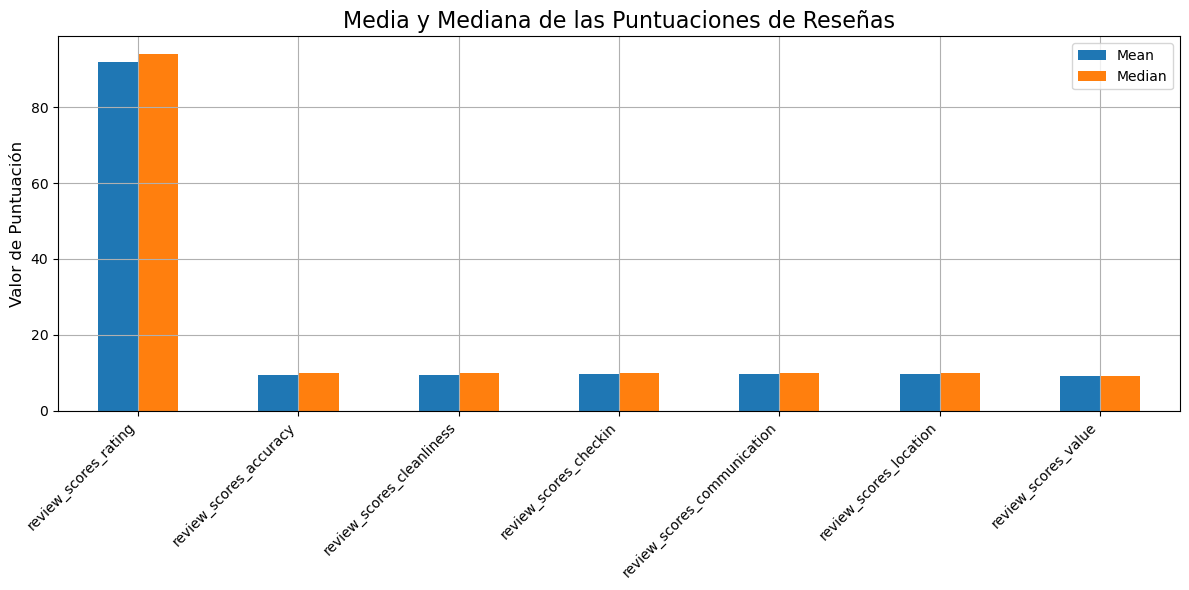

In [ ]:
# Filtrar las columnas relacionadas con las puntuaciones
review_score_cols = [col for col in df_reviews.columns if col.startswith('review_scores_')]

# Calcular la media y la mediana de cada columna de puntuación
mean_values = df_reviews[review_score_cols].mean()
median_values = df_reviews[review_score_cols].median()

# Crear un DataFrame para almacenar las medias y medianas
summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values
})

# Graficar
plt.figure(figsize=(12, 6))

# Graficamos las medias y medianas
summary_df.plot(kind='bar', figsize=(12, 6))

# Configurar el gráfico
plt.title('Media y Mediana de las Puntuaciones de Reseñas', fontsize=16)
plt.ylabel('Valor de Puntuación', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

### Vemos la media y la mediana de las reviews

In [15]:
# calcular Q75 de rating
rating_q75 = df_reviews.review_scores_rating.quantile(0.75)
# crear variable favourite
df_mod = (
    df_reviews
    .assign(favourite=lambda x: x.review_scores_rating.gt(rating_q75))
)
df_mod

,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,favourite
0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False
1,3,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0,False
2,4,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,False
3,6,170,17,93.0,10.0,10.0,10.0,10.0,10.0,10.0,1.47,46,3475,133.0,23.0,14.0,False
4,8,162,12,93.0,9.0,9.0,9.0,10.0,10.0,9.0,1.41,161,3441,99.0,44.0,19.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,21348,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False
11085,21349,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3,3,1.0,0.0,0.0,False
11086,21350,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False
11087,21352,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False


### Se puede comprobar que hay una media increible en la puntuación del alojamiento pero hay muy poco flujo en el resto de reseñas. Esto quiere decir que las otras valoraciones no son muy importantes para el valor del precio pero si el del rating.

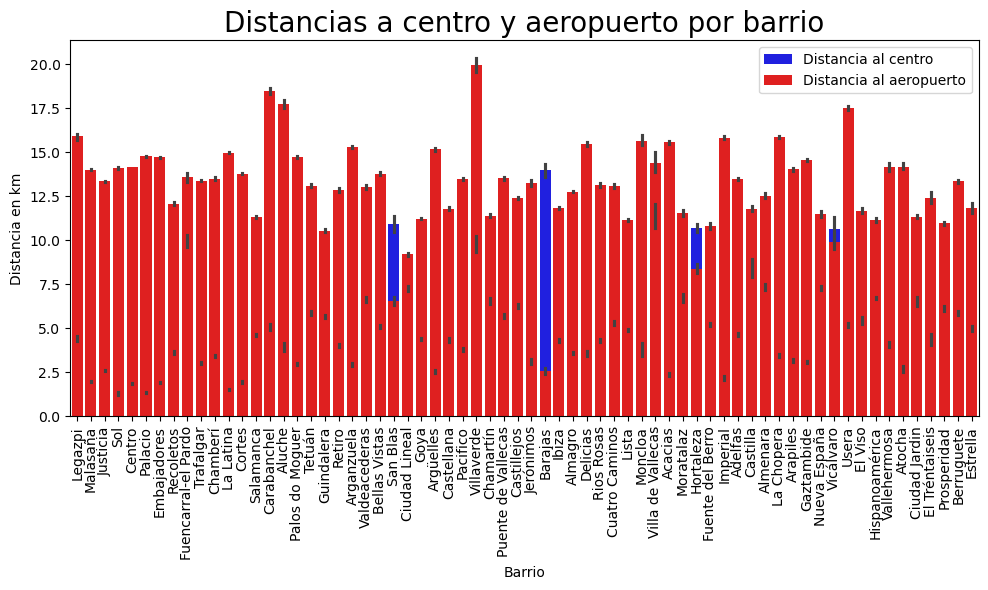

In [17]:
# Configuración de la gráfica
plt.figure(figsize=(10, 6))

# Graficamos las dos distancias
sns.barplot(x='neighbourhood', 
            y='dist_km_sol', 
            data=df_location, 
            color='blue', 
            label='Distancia al centro')

sns.barplot(x='neighbourhood', 
            y='dist_km_airport', 
            data=df_location, 
            color='red', 
            label='Distancia al aeropuerto')

# Añadir etiquetas
plt.title('Distancias a centro y aeropuerto por barrio', fontsize=20)
plt.xlabel('Barrio')
plt.ylabel('Distancia en km')
plt.xticks(rotation=90)
plt.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()

### La mayoria de los alojamientos son en centro o barrios alrededor. Estos son los que tienen más valor y todos tienen una distancia parecida al aeropuerto porque esta a las afueras.

Numero de propiedas por Barrio

C:\Users\andy_\AppData\Local\Temp\ipykernel_20704\4225812554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=properties_by_group.index, y=properties_by_group.values, palette='muted')


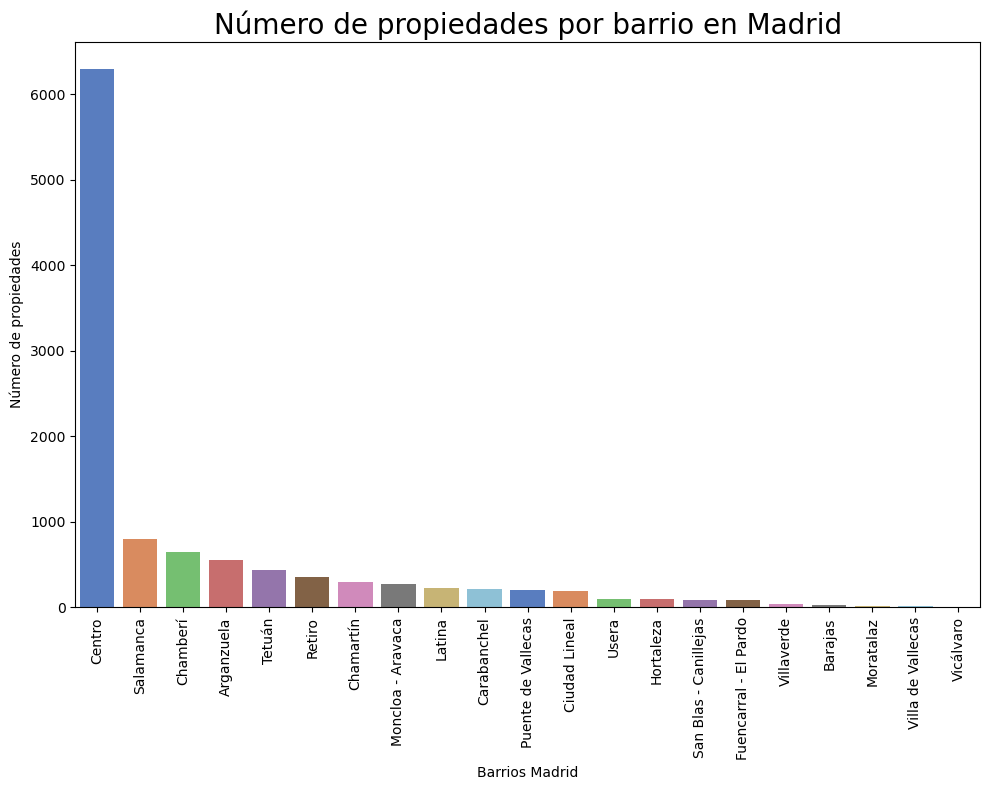

In [18]:
# Contamos el número de propiedades por grupo de barrio
properties_by_group = df_location['neighbourhood_group'].value_counts()

# Configuración del gráfico
plt.figure(figsize=(10, 8))

# Graficamos el número de propiedades por grupo de barrio
sns.barplot(x=properties_by_group.index, y=properties_by_group.values, palette='muted')

# Añadir título y etiquetas
plt.title('Número de propiedades por barrio en Madrid', fontsize=20)
plt.xlabel('Barrios Madrid')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### TIPOS DE VIVIENDAS EN ALQUILER

In [22]:
# extraer automáticamente las columnas que son numéricas
numeric_cols = [c for c, t in zip(df_property.columns, df_property.dtypes) if t != "O"]
# calcular la media de todas las columnas numéricas
# calcular estadísticos a la vez de todas las columnas numéricas
statistics = {
    "mean": "mean", 
    "median": "median",
    "q25": lambda x: x.quantile(0.25),
    "q50": lambda x: x.quantile(0.50),
    "q75": lambda x: x.quantile(0.75),
    "std": "std",
    "var": "var",
}
df_statistics = (
    df_property[numeric_cols]
    .agg(statistics.values())
    .transpose()
)
df_statistics.columns = statistics.keys()
df_statistics

,mean,median,q25,q50,q75,std,var
id,10224.808012,9830.0,4994.5,9830.0,15211.0,6126.696278,3.753641e+07
accommodates,4.032576,4.0,3.0,4.0,5.0,1.628910,2.653346e+00
bathrooms,1.252167,1.0,1.0,1.0,1.5,0.471480,2.222929e-01
bedrooms,1.452049,1.0,1.0,1.0,2.0,0.797797,6.364803e-01
beds,2.259786,2.0,1.0,2.0,3.0,1.260234,1.588190e+00
amenities_wifi_internet,0.953280,1.0,1.0,1.0,1.0,0.211047,4.454094e-02
amenities_tv,0.917602,1.0,1.0,1.0,1.0,0.274983,7.561549e-02
amenities_air_conditioning,0.793686,1.0,1.0,1.0,1.0,0.404677,1.637637e-01
amenities_heating,0.931289,1.0,1.0,1.0,1.0,0.252973,6.399534e-02
amenities_kitchen,0.979104,1.0,1.0,1.0,1.0,0.143043,2.046129e-02


C:\Users\andy_\AppData\Local\Temp\ipykernel_20704\2247768543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_per_night'] = df_filtered['price'] / df_filtered['minimum_nights']


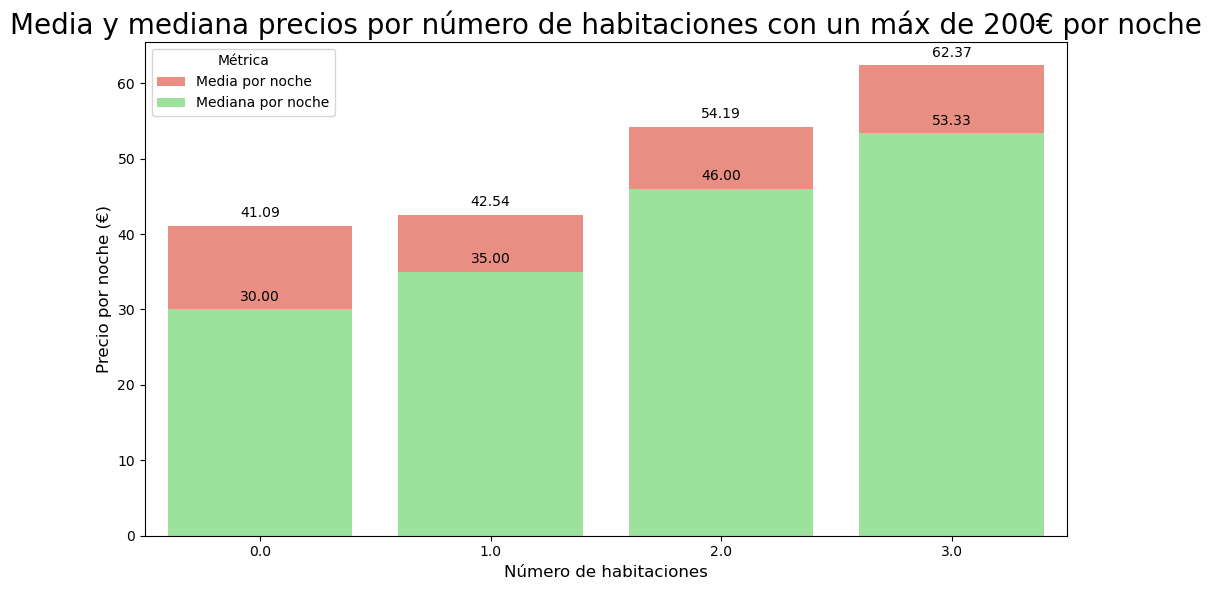

In [23]:
# Unir los dataframes df_property y df_conditions por la columna 'id'
df_combined = pd.merge(df_property, df_conditions, on='id', how='inner')

# Filtrar los registros donde el número de habitaciones es <= 3 y el precio es <= 200€
df_filtered = df_combined[(df_combined['bedrooms'] <= 3) & (df_combined['price'] <= 200)]

# Calcular el precio por noche
df_filtered['price_per_night'] = df_filtered['price'] / df_filtered['minimum_nights']

# Calcular el precio mínimo, media y mediana por número de habitaciones
price_by_rooms = df_filtered.groupby('bedrooms')['price_per_night'].agg(['min', 'mean', 'median']).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Graficar la media por noche
sns.barplot(x='bedrooms',
             y='mean',
               data=price_by_rooms,
                 color='salmon',
                   label='Media por noche')

# Graficar la mediana por noche
sns.barplot(x='bedrooms',
             y='median',
               data=price_by_rooms,
                 color='lightgreen',
                   label='Mediana por noche')

# Añadir valores sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 9), textcoords='offset points')

# Configuración del gráfico
plt.title('Media y mediana precios por número de habitaciones con un máx de 200€ por noche', fontsize=20)
plt.xlabel('Número de habitaciones', fontsize=12)
plt.ylabel('Precio por noche (€)', fontsize=12)
plt.legend(title='Métrica')
plt.tight_layout()

# Mostrar gráfico
plt.show()

### Ver los precios de las viviendas con la media, mediana, q25, q50, 175, std y var

In [25]:
# extraer automáticamente las columnas que son numéricas
numeric_cols = [c for c, t in zip(df_conditions.columns, df_conditions.dtypes) if t != "O"]
# calcular la media de todas las columnas numéricas
# calcular estadísticos a la vez de todas las columnas numéricas
statistics = {
    "mean": "mean", 
    "median": "median",
    "q25": lambda x: x.quantile(0.25),
    "q50": lambda x: x.quantile(0.50),
    "q75": lambda x: x.quantile(0.75),
    "std": "std",
    "var": "var",
}
df_statistics = (
    df_conditions[numeric_cols]
    .agg(statistics.values())
    .transpose()
)
df_statistics.columns = statistics.keys()
df_statistics

,mean,median,q25,q50,q75,std,var
id,10224.808012,9830.0,4994.5,9830.0,15211.0,6126.696278,3.753641e+07
price,138.158774,80.0,60.0,80.0,116.0,364.554592,1.329001e+05
minimum_nights,4.594124,2.0,1.0,2.0,3.0,21.208537,4.498020e+02
maximum_nights,1799.596679,1125.0,100.0,1125.0,1125.0,106136.564193,1.126497e+10
require_guest_profile_picture,0.008851,0.0,0.0,0.0,0.0,0.093668,8.773630e-03
require_guest_phone_verification,0.016881,0.0,0.0,0.0,0.0,0.128832,1.659765e-02


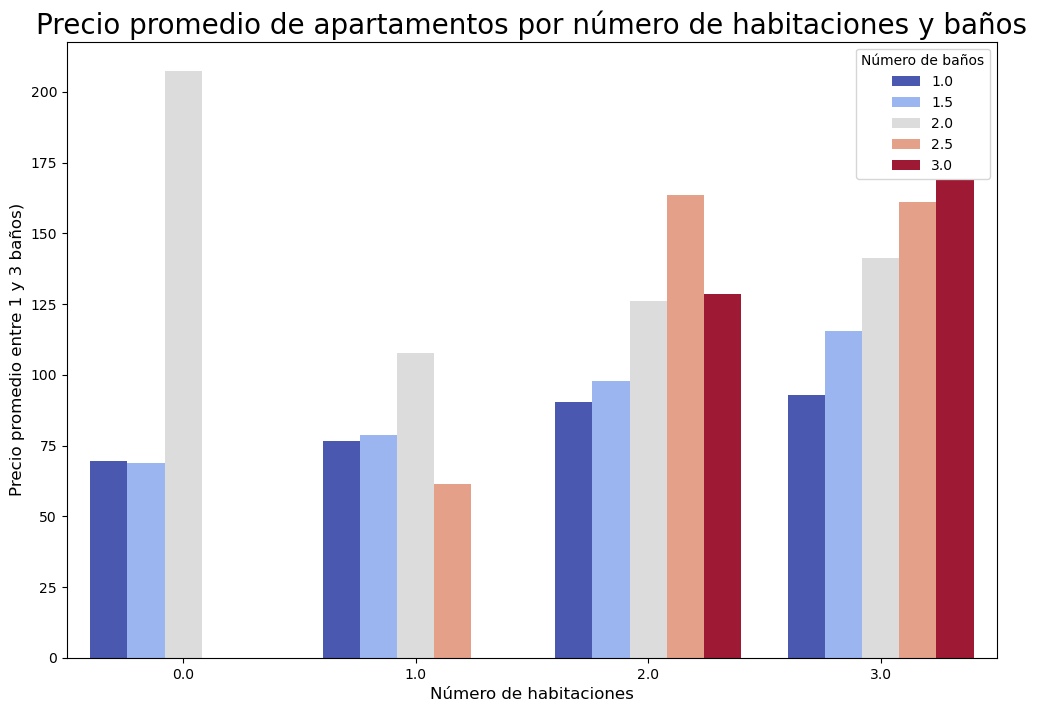

In [27]:
# Unir ambos DataFrames usando la columna 'id'
df_combined = pd.merge(df_conditions, df_property, on='id')

# Filtrar los datos para incluir solo apartamentos cuyo precio sea <= 300€ y con entre 1 y 3 baños
df_filtered = df_combined[(df_combined['price'] <= 300) & (df_combined['bathrooms'] >= 1) & (df_combined['bathrooms'] <= 3)]

# Agrupar los datos por número de habitaciones y baños, y calcular el precio promedio
df_avg_price = df_filtered.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Usamos seaborn para crear un gráfico de barras
sns.barplot(data=df_avg_price, x='bedrooms', y='price', hue='bathrooms', palette='coolwarm')

# Mejorar el gráfico con títulos y etiquetas
plt.title('Precio promedio de apartamentos por número de habitaciones y baños', fontsize=20)
plt.xlabel('Número de habitaciones', fontsize=12)
plt.ylabel('Precio promedio entre 1 y 3 baños)', fontsize=12)
plt.legend(title="Número de baños", loc='upper right')

# Mostrar el gráfico
plt.show()

Precio promedio de los apartamentos por noche.
- Como se puede ver el precio medio va subiendo en función del numero de habitaciones y de baños
- El Rango es hasta 200€.

In [ ]:
# Combinar los dos DataFrames por la columna 'id'
df_combined = pd.merge(df_property, 
                       df_conditions, 
                       on='id', 
                       how='inner')

C:\Users\andy_\AppData\Local\Temp\ipykernel_20704\1567693970.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




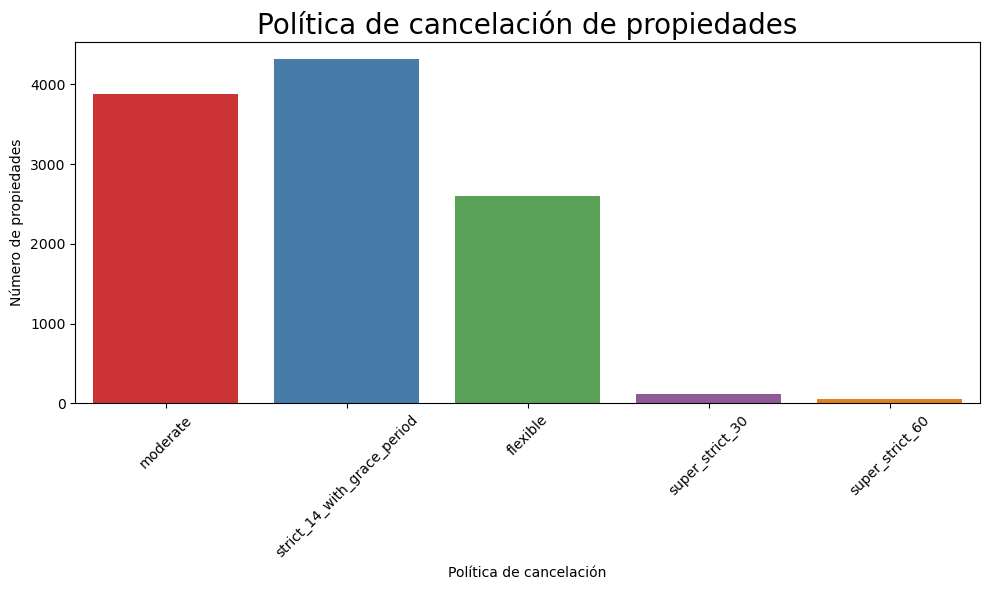

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_conditions, x='cancellation_policy', palette='Set1')
plt.title('Política de cancelación de propiedades', fontsize=20)
plt.xlabel('Política de cancelación')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Política de cancelación: Un gráfico de barras para visualizar cuántas propiedades ofrecen cada tipo de política de cancelación (Flexible, Moderada, Estricta, etc.).
- Como podemos ver la mayoria se mueve en moderada, con un periodo de cancelación de 14 días previos y flexible.

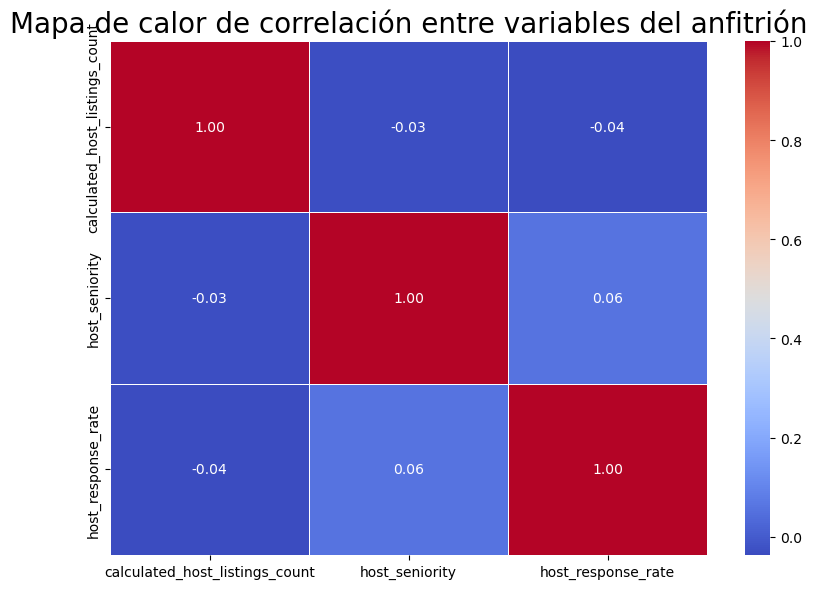

In [52]:
# Seleccionamos las columnas numéricas para calcular la correlación
numeric_columns = ['calculated_host_listings_count', 'host_seniority', 'host_response_rate']
df_numeric = df_host[numeric_columns]

# Calculamos la matriz de correlación
corr_matrix = df_numeric.corr()

# Configuración del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título
plt.title('Mapa de calor de correlación entre variables del anfitrión', fontsize=20)

# Mostrar gráfica
plt.tight_layout()

### Mapa de calor para ver las condiciones que se tienen en cuenta para ser un súper anfitrión

In [39]:
# Unimos los dataframes por 'id'
df_combinado = df_reviews \
    .merge(df_location, on="id") \
    .merge(df_conditions, on="id") \
    .merge(df_property, on="id") \
    .merge(df_host, on="id")

### Unimos todos los dataframe por la columna "id"

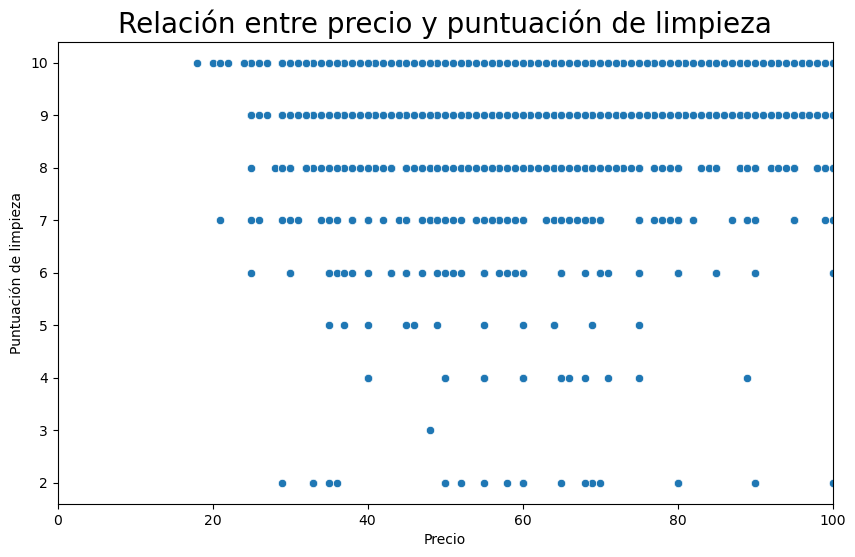

In [40]:
# Gráfico de dispersión de precio vs puntuación de limpieza
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_combinado['price'], 
                y=df_combinado['review_scores_cleanliness']
                )
plt.title('Relación entre precio y puntuación de limpieza', fontsize=20)
plt.xlabel('Precio')
plt.ylabel('Puntuación de limpieza')
plt.xlim(0, 100)
plt.show()



### Gráfico con la relación entre puntuación de limpieza y el precio por noche.

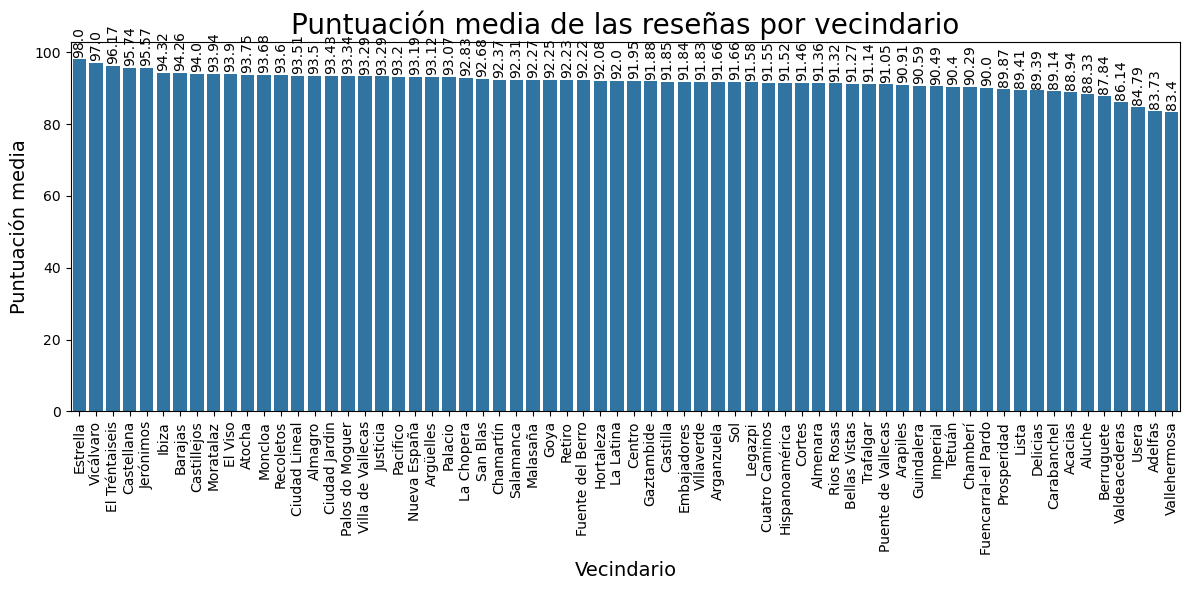

In [41]:
# Agrupar por vecindario y calcular la media de la puntuación de las reseñas
df_reviews_media = df_combinado.groupby('neighbourhood')['review_scores_rating'].mean().reset_index()

# Ordenar los vecindarios de acuerdo con la puntuación media de mayor a menor
df_reviews_media = df_reviews_media.sort_values(by='review_scores_rating', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='neighbourhood', y='review_scores_rating', data=df_reviews_media)

# Añadir título y ajustar etiquetas
plt.title('Puntuación media de las reseñas por vecindario', fontsize=20)
plt.xlabel('Vecindario', fontsize=14)
plt.ylabel('Puntuación media', fontsize=14)
plt.xticks(rotation=90)

# Añadir las etiquetas sobre las barras con ajuste en la posición vertical
for index, value in enumerate(df_reviews_media['review_scores_rating']):
    plt.text(index, value + 0.5, round(value, 2), ha='center', va='bottom', fontsize=10, rotation=90)  # Se aumenta el desplazamiento en y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar para que las etiquetas no se corten
plt.show()

### Gráfico con la puntuación media de las reseñas por vecindario

C:\Users\andy_\AppData\Local\Temp\ipykernel_20704\3714288375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df_condiciones_ubicacion, palette='coolwarm')


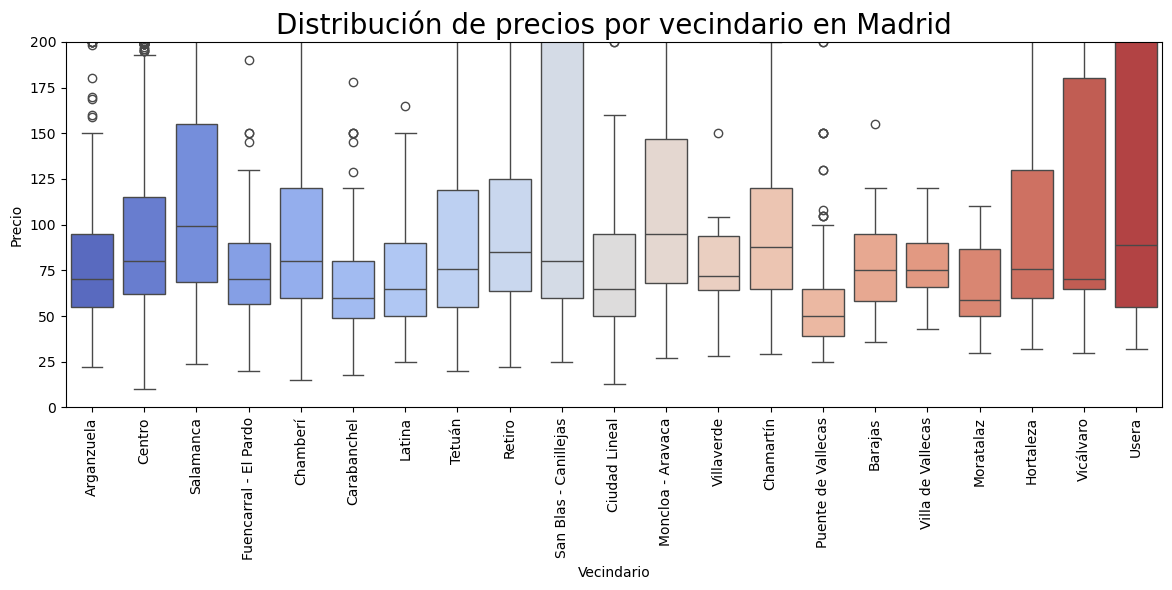

In [42]:
# Unimos los dataframes df_conditions y df_location por la columna 'id'
df_condiciones_ubicacion = df_conditions.merge(df_location, on="id")

# Graficar boxplot del precio por vecindario
plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_condiciones_ubicacion, palette='coolwarm')

# Títulos y etiquetas de los ejes
plt.title('Distribución de precios por vecindario en Madrid', fontsize=20)
plt.xlabel('Vecindario')
plt.ylabel('Precio')

# Mejorar visibilidad de las etiquetas
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, 200)

# Mostrar gráfico
plt.show()

### Gráfico con los precios medios por barrio, poniendo un tope de 200€

In [ ]:
import plotly.express as px

# Unir df_reviews con df_location a través de la columna 'id'
df_combined = pd.merge(df_reviews, 
                       df_location, 
                       on='id', 
                       how='inner')

# Verifica que la unión fue exitosa
df_combined.head()

,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,...,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport
0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212
1,3,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,...,1868,6.0,2.0,1.0,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964
2,4,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,...,3144,37.0,23.0,7.0,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384
3,6,170,17,93.0,10.0,10.0,10.0,10.0,10.0,10.0,...,3475,133.0,23.0,14.0,Sol,Centro,40.41552,-3.70346,0.104131,14.106658
4,8,162,12,93.0,9.0,9.0,9.0,10.0,10.0,9.0,...,3441,99.0,44.0,19.0,Justicia,Centro,40.41978,-3.69730,2.336413,13.383317


### Unimos el dataframe de reseñas y localización para graficar

In [44]:
fig = px.bar(df_combined,
             x='neighbourhood_group', 
             y='review_scores_rating', 
             color='neighbourhood_group',
             title='Puntuación Promedio de Reseñas por Vecindario',
             labels={'review_scores_rating': 'Puntuación Promedio',
                     'neighbourhood': 'Vecindario'},
             height=500)

# Mostrar el gráfico
fig.show()

### Gráfico interactivo con la puntuación por barrio

In [ ]:
# Unir df_reviews, df_conditions y df_location usando la columna 'id'
df_combined_conditions_location = pd.merge(df_reviews, 
                                           df_conditions, 
                                           on='id', 
                                           how='inner')
df_combined_conditions_location = pd.merge(df_combined_conditions_location, 
                                           df_location, 
                                           on='id', 
                                           how='inner')

# Verifica que la columna 'neighbourhood' esté disponible
df_combined_conditions_location.head()

,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,...,maximum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport
0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,730,moderate,0,0,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212
1,3,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,...,730,moderate,0,0,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964
2,4,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10,moderate,0,0,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384
3,6,170,17,93.0,10.0,10.0,10.0,10.0,10.0,10.0,...,180,moderate,0,0,Sol,Centro,40.41552,-3.70346,0.104131,14.106658
4,8,162,12,93.0,9.0,9.0,9.0,10.0,10.0,9.0,...,365,strict_14_with_grace_period,0,0,Justicia,Centro,40.41978,-3.69730,2.336413,13.383317


### Mergeamos los distintos dataframe para poder graficar

In [49]:
# Contar la cantidad de veces que cada comodidad es True (por ejemplo, 1 significa que la comodidad está presente)
amenities_columns = ['amenities_wifi_internet', 'amenities_tv', 'amenities_air_conditioning', 'amenities_heating', 'amenities_kitchen']
amenities_count = df_property[amenities_columns].sum()

# Crear un gráfico de barras
fig = px.bar(
    x=amenities_count.index,
    y=amenities_count.values,
    labels={'x': 'Comodidad', 'y': 'Frecuencia'},
    title='Frecuencia de comodidades disponibles',
    color=amenities_count.index
)

# Mostrar el gráfico
fig.show()

### Gráfico interactivo con los amenities que disponen en las viviendas